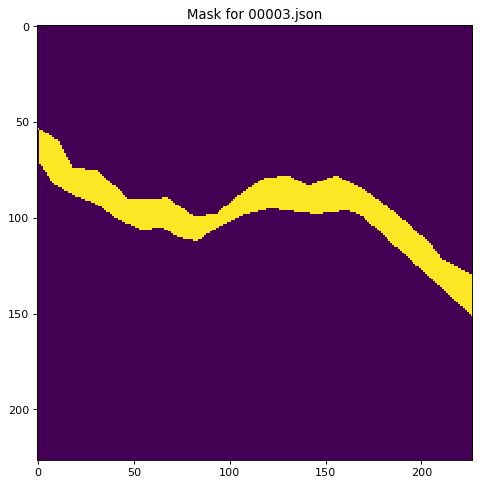

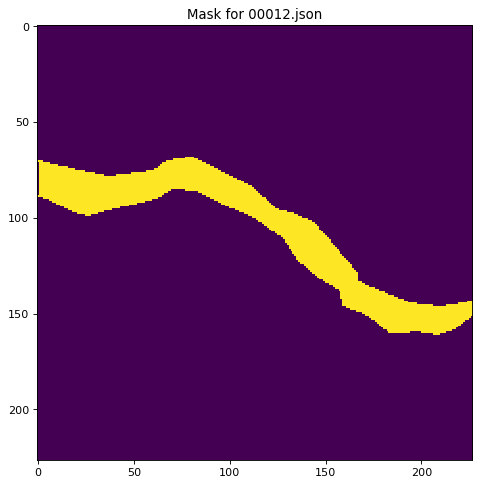

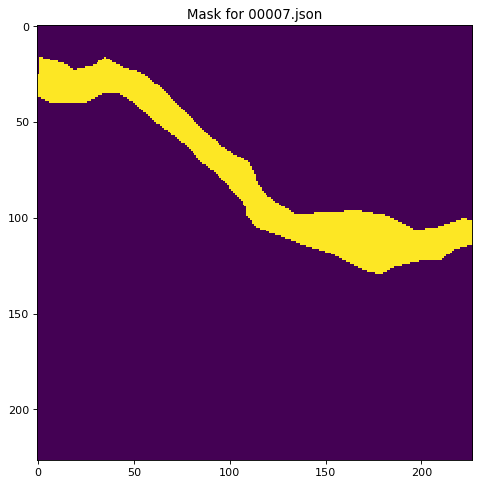

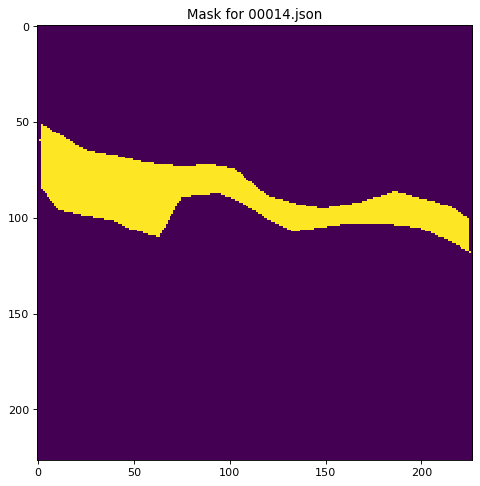

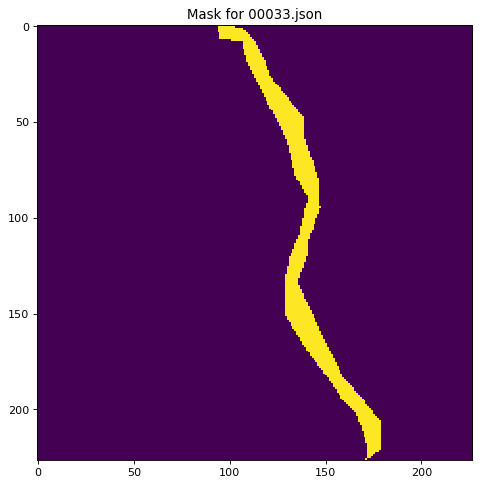

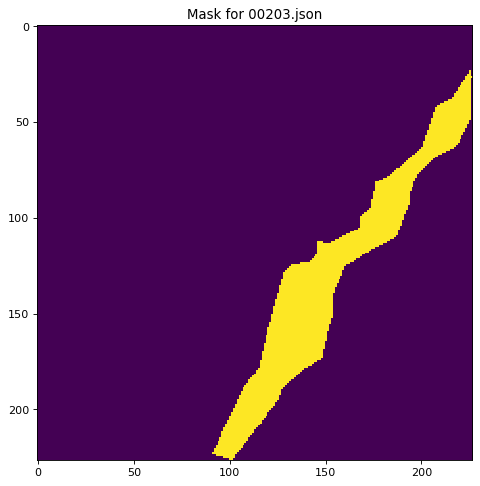

In [13]:
import json

from PIL import Image, ImageDraw

import numpy as np

import matplotlib.pyplot as plt

from skimage.io import imshow



# Example for a label mask for image 00005



# read json file

import os


# Function to load labels from a LabelMe JSON file
def load_labels_from_json(path, filename):
    with open(os.path.join(path, filename), "r") as f:
        labelmask = json.load(f)
    
    # Extract polygon from json
    polygon = labelmask["shapes"][0]["points"]
    polygon1 = [tuple(poly) for poly in polygon]
    
    return polygon1


def polygon_to_pixel_indices(polygon_coords, image_size):

    # Create a new blank image with a white background

    mask = Image.new('L', image_size, color=0)



    # Create a draw object

    draw = ImageDraw.Draw(mask)



    # Draw the polygon on the mask image

    draw.polygon(polygon_coords, fill=255)



    # Get the pixel indices where the polygon is present

    indices = []

    for x in range(mask.width):

        for y in range(mask.height):

            if mask.getpixel((x, y)) == 255:

                indices.append((x, y))



    return indices


def polygon_to_binary_array(polygon_coords, image_size):

    # polygon_coords come directly from the read function, image_size has to be a tuple e.g. (227, 227)



    # Generate indices of pixels within the mask

    indices = polygon_to_pixel_indices(polygon_coords, image_size=image_size)



    # convert tuple back to array

    indices_arr = np.array([list(inds) for inds in indices])



    # initialize empty image

    binary_image = np.zeros((image_size))



    # occupy the empty image with the indices

    for i in indices_arr:

        binary_image[i[0], i[1]] = 1



    return binary_image



import os
json_filenames = ["00003.json", "00012.json", "00007.json", "00014.json", "00033.json", "00203.json"]  # Add more filenames as needed

# Iterate through each JSON filename and mask the image
for filename in json_filenames:
    # Join the path and filename using os.path.join
    full_path = os.path.join(path, filename)
    
    # Load labels from the JSON file
    polygon = load_labels_from_json(path, filename)
    
    # Convert polygon to a binary mask array
    binary_array = polygon_to_binary_array(polygon, (227, 227))
    
    # Visualize mask image
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    imshow(binary_array, cmap='viridis')
    plt.title(f"Mask for {filename}")
    plt.show()